In [1]:

#read map from file
M = [x.strip() for x in open("24.txt").readlines()]

#Walk through map and extract keypoints
#also clear paths and convert to list of lists
kp = {}
W=[]
for y in range(len(M)):
    l = list(M[y])
    for x in range(len(M[0])):
        if l[x] in "0123456789":
            kp[int(l[x])] = [x,y]
        if l[x] != '#':
            l[x]=' '
    W.append(l)
    #print("".join(l))
M=W


#pathfinding function. Will return shortest path from a to b    
def pf(a,b):
    x0,y0 = a
    x1,y1 = b
    
    #print(x0,y0,x1,y1)
    
    future = { 0: [[[x0,y0], 0]] }
    past = {}
    
    #heurestic
    def h(s):
        x,y=s
        return abs(x-x0)+abs(y-y0)
    
    def ser(x,y):
        return "%d,%d"%(x,y) 
    
    def f(s):
        p,c = s
        return h(p)+c
    
    while sum([len(future[x]) for x in future.keys()]):
        
        mix = min(future.keys())
        n,c=future[mix][0]
        future[mix]=future[mix][1:]
        if len(future[mix]) == 0:
            del future[mix]
        
        x,y = n
        if x == x1 and y == y1:
            #print("goal")
            #print(len(past.keys()))
            return c
        
        past[ser(x,y)] = 1
        
        for dx,dy in [[-1,0],[1,0],[0,-1],[0,1]]:
            xx = x+dx
            yy = y+dy
            
            if M[yy][xx] == ' ':
                np = [xx,yy]
                nc = c+1
                if ser(xx,yy) not in past:
                    hv = h(np)
                    ns = [np,nc]
                    ff = f(ns)
                    if ff not in future:
                        future[ff] = []
                    future[ff].append(ns)
    return -1
                    
    
a = 0
sk = list(kp.keys())
sk.sort()
print(sk)
for i in range(len(sk)-1):
    v = pf(kp[i], kp[i+1])
    print("from ", str(kp[i]), " to ", str(kp[i+1]), " = ", v)
    a+=v

print("part1", a)    
 


[0, 1, 2, 3, 4, 5, 6, 7]
from  [153, 9]  to  [167, 17]  =  30
from  [167, 17]  to  [139, 41]  =  68
from  [139, 41]  to  [171, 31]  =  54
from  [171, 31]  to  [131, 1]  =  94
from  [131, 1]  to  [1, 41]  =  198
from  [1, 41]  to  [23, 9]  =  82
from  [23, 9]  to  [7, 21]  =  60
part1 586


181 43
{4: [131, 1], 6: [23, 9], 0: [153, 9], 1: [167, 17], 7: [7, 21], 3: [171, 31], 5: [1, 41], 2: [139, 41]}


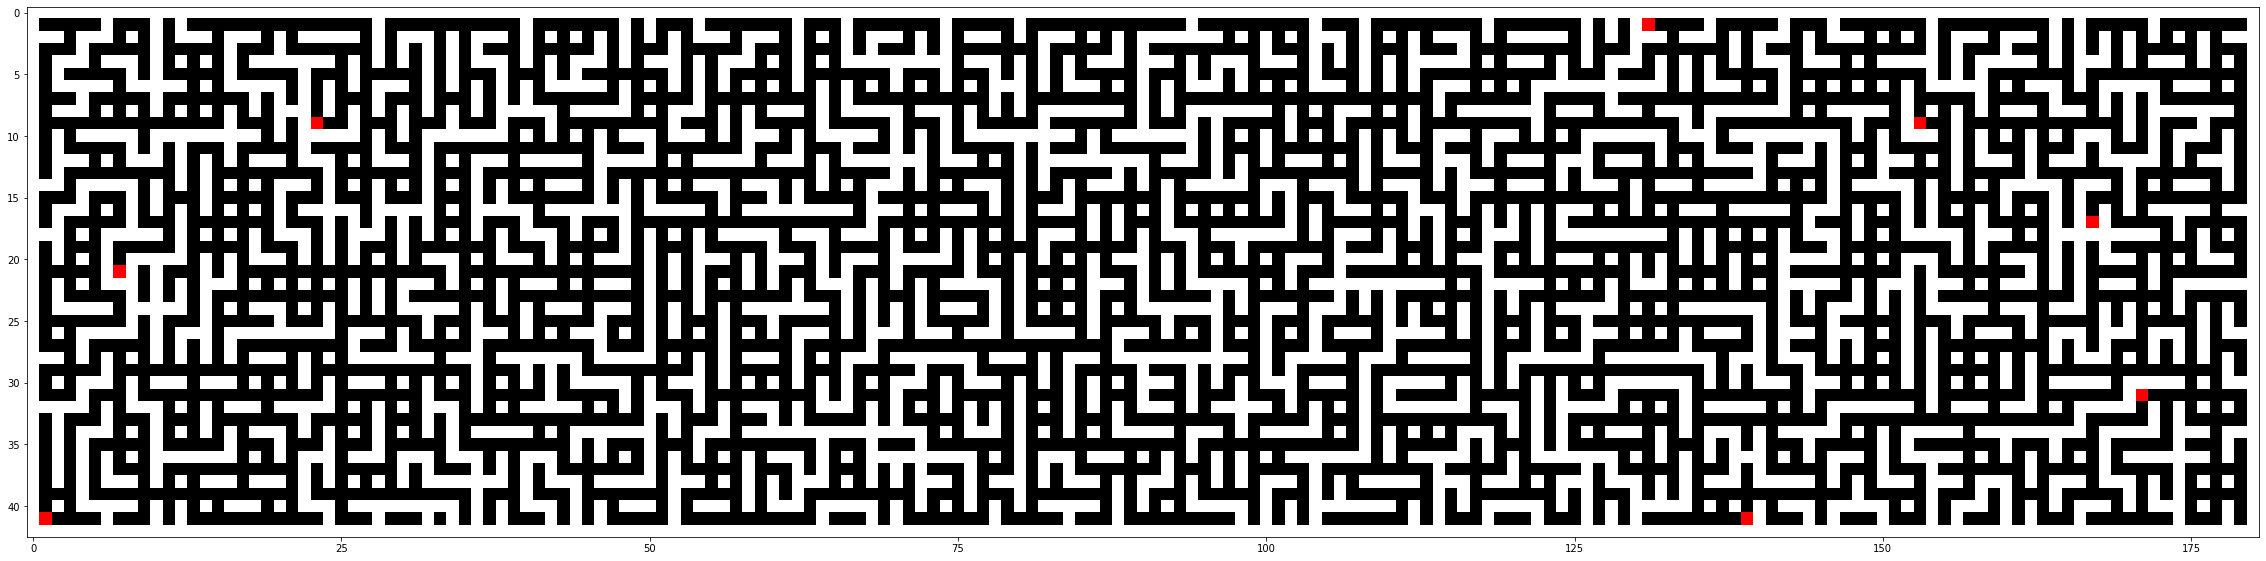

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import time

w = len(M[0])
h = len(M)

data = np.random.rand(h, w, 3)

print(w,h)
print(kp)
for y in range(h):
    for x in range(w):
        if [x,y] in kp.values():
            data[y,x,:] = [1,0,0]
        elif M[y][x] == '#':
            data[y,x,:] = [1,1,1]
        else:
            data[y,x,:] = [0,0,0]
plt.figure(figsize = (40,40))            
plt.imshow(data)
plt.show()

In [3]:
#Must atsrt at zero

import itertools

cache = {}


def a(part):
    shortest_dist = None
    order=0
    
    for o in itertools.permutations(sk[1:]):
        o = [0]+list(o)
        if part==2:
            o+=[0]
        #print(o)
        acc=0
        for i in range(len(o)-1):
            a = o[i]
            b = o[i+1]
            k = "%d,%d"%(a,b)
            v = None
            if k in cache:
                #print("cache", k)
                v = cache[k]
            else:
                print(o[i],o[i+1])
                v = pf(kp[o[i]], kp[o[i+1]])
                cache[k] = v
                cache[k[::-1]] = v
                #print("from ", str(kp[i]), " to ", str(kp[i+1]), " = ", v)
            acc+=v
        if shortest_dist is None or acc < shortest_dist:
            shortest_dist = acc
            order = o
    print(order)
    return shortest_dist

print("part1:", a(1))
print("part2:", a(2))

print(len(cache.keys()))





0 1
1 2
2 3
3 4
4 5
5 6
6 7
5 7
4 6
4 7
3 5
3 6
3 7
2 4
2 5
2 6
2 7
1 3
1 4
1 5
1 6
1 7
0 2
0 3
0 4
0 5
0 6
0 7
[0, 1, 3, 2, 4, 6, 7, 5]
part1: 456
[0, 1, 3, 2, 5, 7, 6, 4, 0]
part2: 704
56
